In [1]:
import matplotlib.pyplot as plt
import numpy as np

from radtran import get_gamma
from radtran.filter_functions import (
    generate_absorbing_species_filter,
    generate_solar_filter,
    get_sensor_spectral_response_function,
)

In [2]:
aux_data_path = "../data/aux_data"
hapi_data_path = "../data/hapi_data"
solarangle = 0
obsangle = 0
instrument = "Sentinel2A"
temperature = 300
pressure = 1.013

h2o_concentration = 673
co2_concentration = 400
ch4_concentration = 1.8

In [3]:
gamma = get_gamma(solarangle, obsangle)

In [5]:
b11_wavelenghts = generate_solar_filter(hapi_data_path, aux_data_path, instrument, "B11")[0]
b12_wavelenghts = generate_solar_filter(hapi_data_path, aux_data_path, instrument, "B12")[0]

# Filters
b11_h2o_filter = generate_absorbing_species_filter(
    temperature, pressure, instrument, hapi_data_path, "B11", "H2O", h2o_concentration
)[1]
b12_h2o_filter = generate_absorbing_species_filter(
    temperature, pressure, instrument, hapi_data_path, "B12", "H2O", h2o_concentration
)[1]

b11_co2_filter = generate_absorbing_species_filter(
    temperature, pressure, instrument, hapi_data_path, "B11", "CO2", co2_concentration
)[1]
b12_co2_filter = generate_absorbing_species_filter(
    temperature, pressure, instrument, hapi_data_path, "B12", "CO2", co2_concentration
)[1]

b11_ch4_filter = generate_absorbing_species_filter(
    temperature, pressure, instrument, hapi_data_path, "B11", "CH4", ch4_concentration
)[1]
b12_ch4_filter = generate_absorbing_species_filter(
    temperature, pressure, instrument, hapi_data_path, "B12", "CH4", ch4_concentration
)[1]

b11_solar_filter = generate_solar_filter(hapi_data_path, aux_data_path, instrument, "B11")[1]
b12_solar_filter = generate_solar_filter(hapi_data_path, aux_data_path, instrument, "B12")[1]

b11_sensor_srf = get_sensor_spectral_response_function(hapi_data_path, aux_data_path, instrument, "B11")[1]
b12_sensor_srf = get_sensor_spectral_response_function(hapi_data_path, aux_data_path, instrument, "B12")[1]

# Global filters
b11_global_filter = b11_sensor_srf * b11_solar_filter * (b11_h2o_filter * b11_co2_filter * b11_ch4_filter) ** gamma
b12_global_filter = b12_sensor_srf * b12_solar_filter * (b12_h2o_filter * b12_co2_filter * b12_ch4_filter) ** gamma

b11_global_filter = b11_global_filter / np.mean(b11_global_filter)
b12_global_filter = b12_global_filter / np.mean(b12_global_filter)

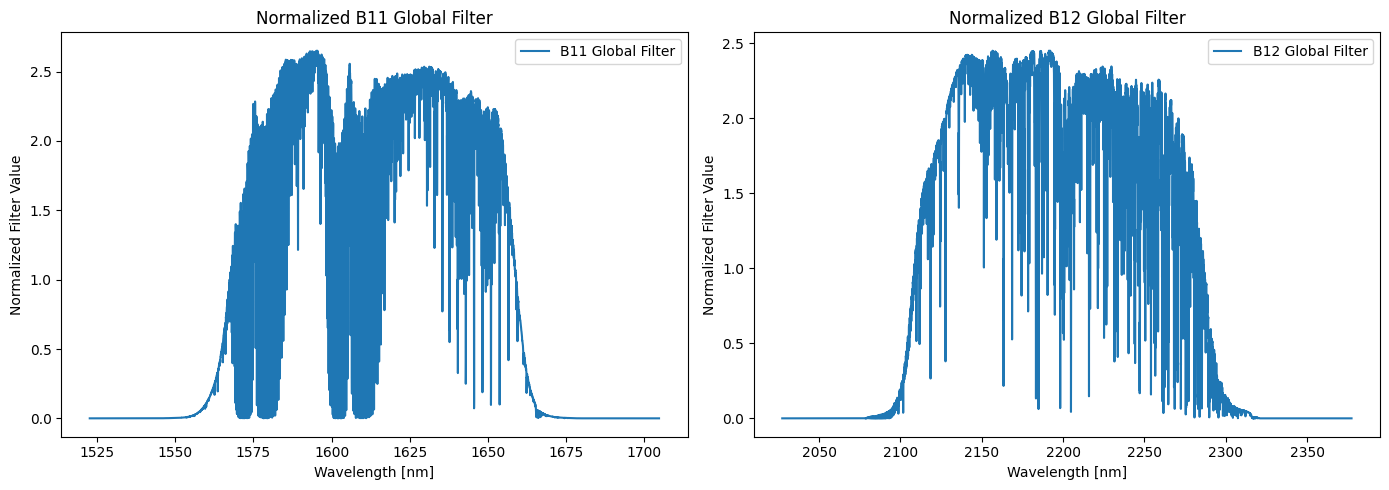

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(b11_wavelenghts, b11_global_filter, label="B11 Global Filter")
axs[0].set_title("Normalized B11 Global Filter")
axs[0].set_xlabel("Wavelength [nm]")
axs[0].set_ylabel("Normalized Filter Value")
axs[0].legend()

axs[1].plot(b12_wavelenghts, b12_global_filter, label="B12 Global Filter")
axs[1].set_title("Normalized B12 Global Filter")
axs[1].set_xlabel("Wavelength [nm]")
axs[1].set_ylabel("Normalized Filter Value")
axs[1].legend()

plt.tight_layout()
plt.show()